In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youth-tobacco-survey/datafile.csv


**Data Read**

In [2]:
data = pd.read_csv('/kaggle/input/youth-tobacco-survey/datafile.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               107 non-null    object 
 1   Area                                                                                                                                   107 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 107 non-null    float64
 3   Current tobacco users (%)                                             

**Visualization**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

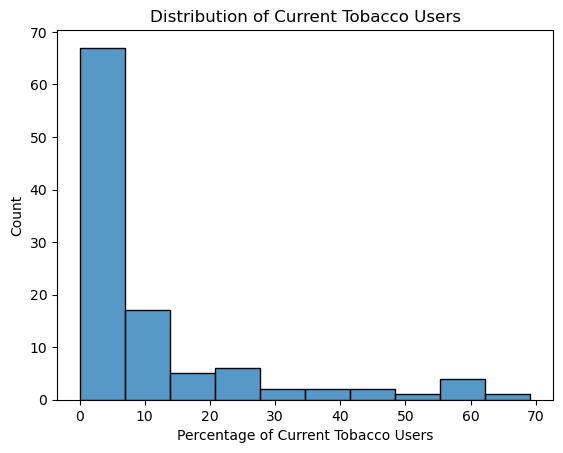

In [5]:
sns.histplot(data=data, x='Current tobacco users (%)', bins=10)
plt.title('Distribution of Current Tobacco Users')
plt.xlabel('Percentage of Current Tobacco Users')
plt.ylabel('Count')
plt.show()

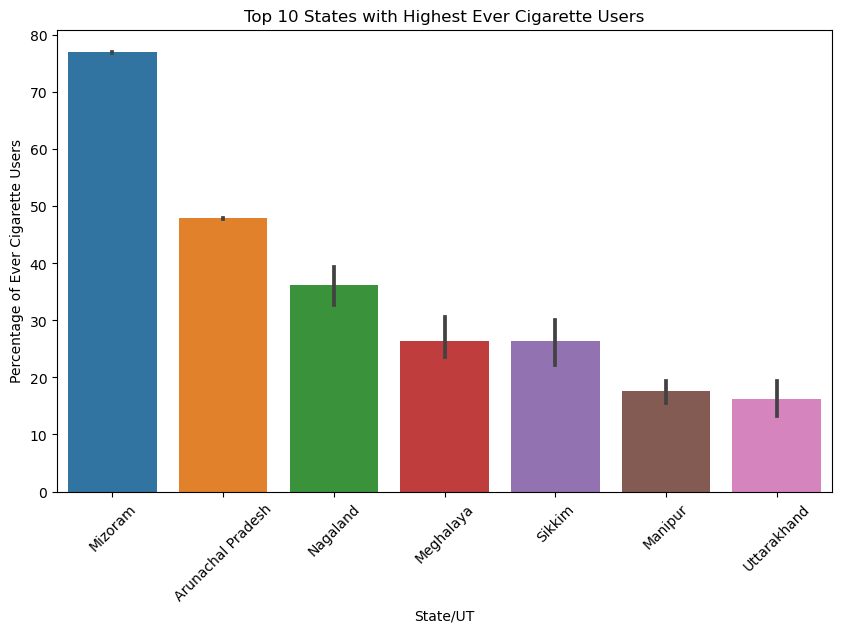

In [6]:
top_cigarette_states = data.nlargest(20, 'Ever cigarette users (%)')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cigarette_states, x='State/UT', y='Ever cigarette users (%)')
plt.title('Top 10 States with Highest Ever Cigarette Users')
plt.xlabel('State/UT')
plt.ylabel('Percentage of Ever Cigarette Users')
plt.xticks(rotation=45)
plt.show()

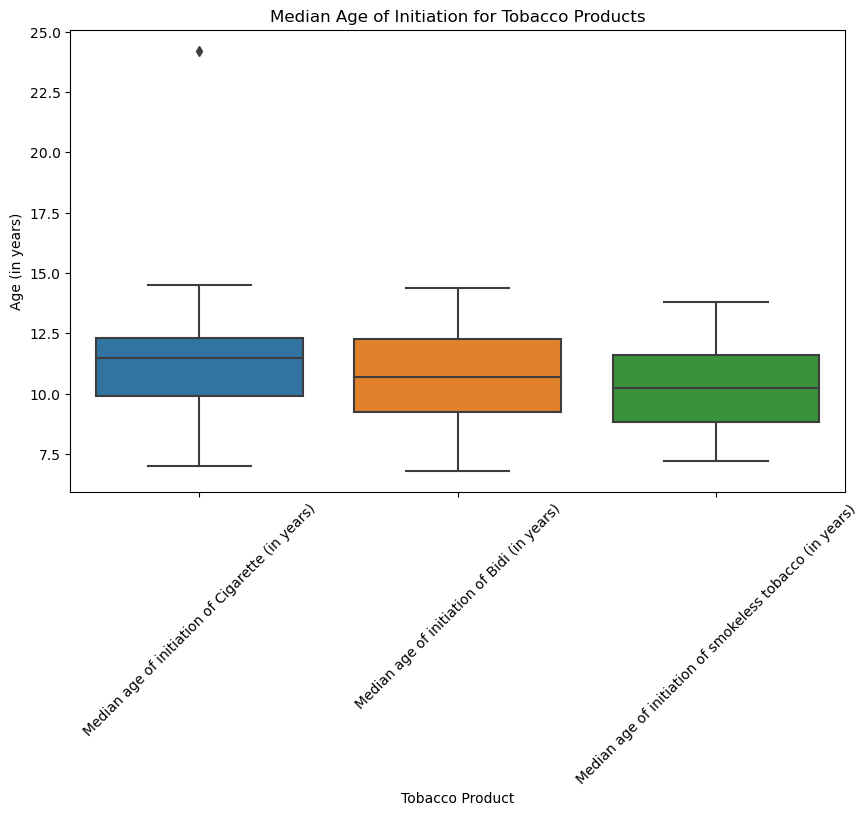

In [7]:
age_columns = ['Median age of initiation of Cigarette (in years)', 'Median age of initiation of Bidi (in years)',
               'Median age of initiation of smokeless tobacco (in years)']
data[age_columns] = data[age_columns].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[age_columns])
plt.title('Median Age of Initiation for Tobacco Products')
plt.xlabel('Tobacco Product')
plt.ylabel('Age (in years)')
plt.xticks(rotation=45)
plt.show()

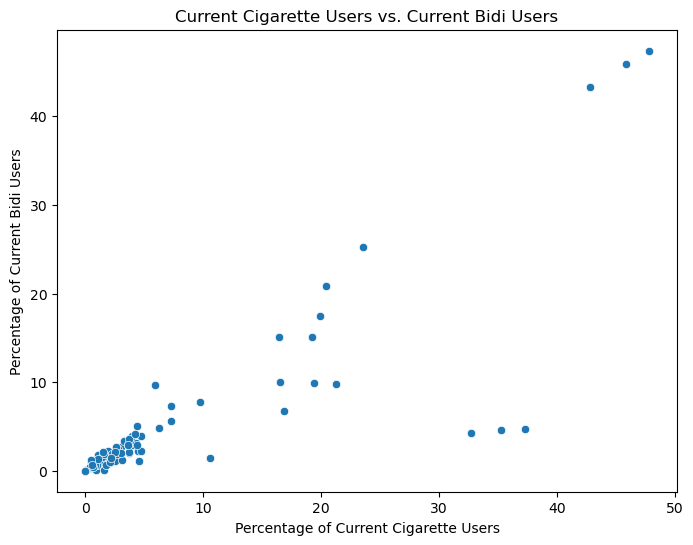

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Current cigarette users (%)', y='Current bidi users (%)')
plt.title('Current Cigarette Users vs. Current Bidi Users')
plt.xlabel('Percentage of Current Cigarette Users')
plt.ylabel('Percentage of Current Bidi Users')
plt.show()

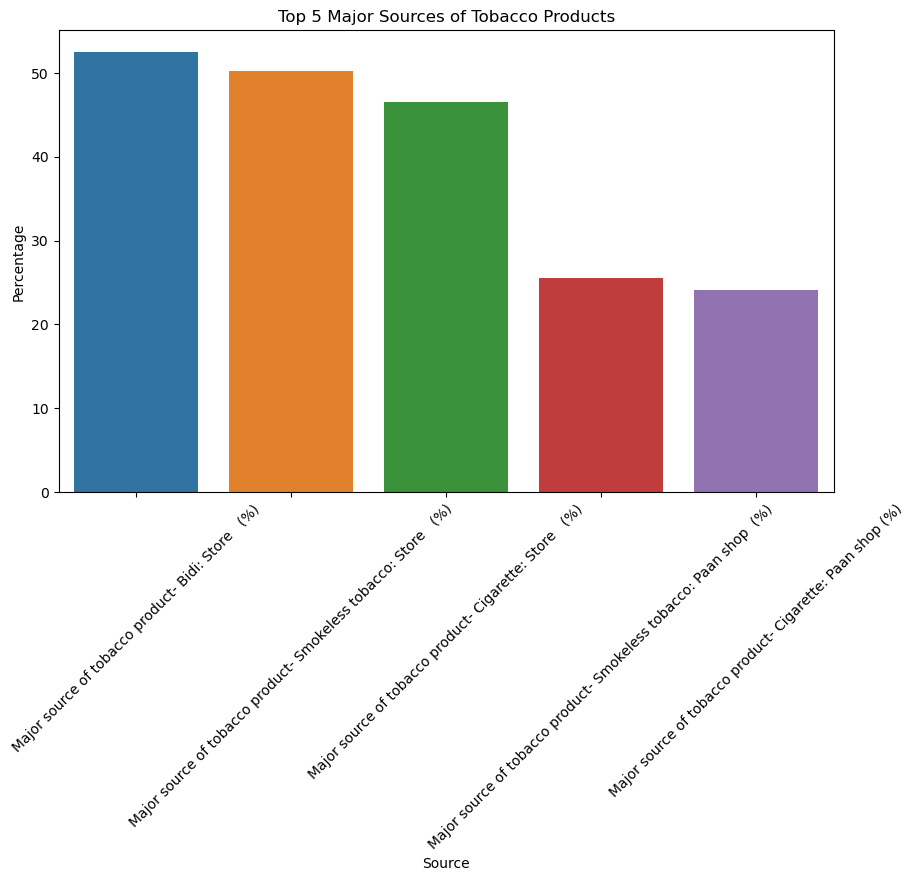

In [9]:
source_columns = ['Major source of tobacco product- Cigarette: Store   (%)',
                  'Major source of tobacco product- Cigarette: Paan shop (%)',
                  'Major source of tobacco product- Bidi: Store   (%)',
                  'Major source of tobacco product- Bidi: Paan shop (%)',
                  'Major source of tobacco product- Smokeless tobacco: Store   (%)',
                  'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)']
top_sources = data[source_columns].mean().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.index, y=top_sources.values)
plt.title('Top 5 Major Sources of Tobacco Products')
plt.xlabel('Source')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x10000 with 0 Axes>

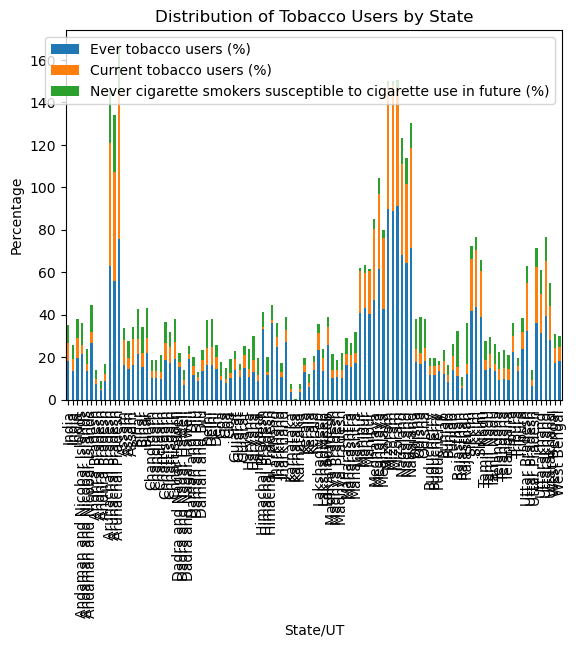

In [10]:
tobacco_columns = ['Ever tobacco users (%)', 'Current tobacco users (%)', 'Never cigarette smokers susceptible to cigarette use in future (%)']
state_data = data[['State/UT'] + tobacco_columns].set_index('State/UT')

plt.figure(figsize=(10, 100))
state_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Tobacco Users by State')
plt.xlabel('State/UT')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

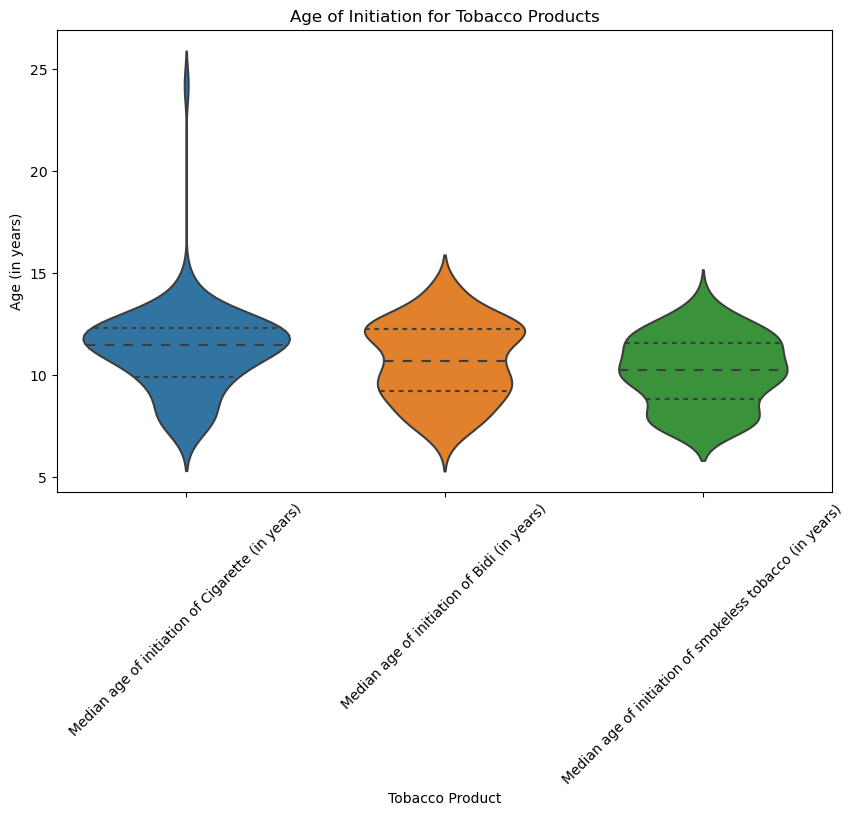

In [11]:
age_columns = ['Median age of initiation of Cigarette (in years)', 'Median age of initiation of Bidi (in years)',
               'Median age of initiation of smokeless tobacco (in years)']
age_data = data[age_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(data=age_data, inner='quartile')
plt.title('Age of Initiation for Tobacco Products')
plt.xlabel('Tobacco Product')
plt.ylabel('Age (in years)')
plt.xticks(rotation=45)
plt.show()

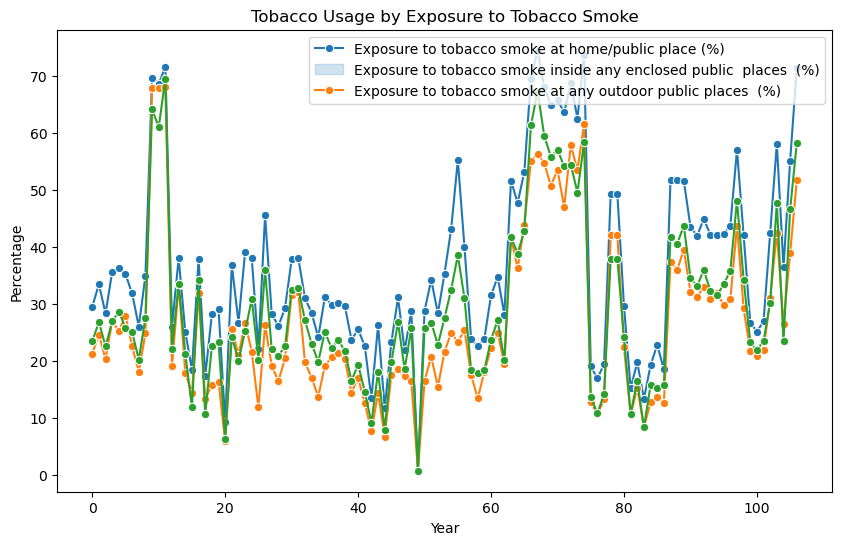

In [12]:
exposure_columns = ['Exposure to tobacco smoke at home/public place (%)',
                    'Exposure to tobacco smoke inside any enclosed public  places  (%)',
                    'Exposure to tobacco smoke at any outdoor public places  (%)']
exposure_data = data[exposure_columns]

plt.figure(figsize=(10, 6))
sns.lineplot(data=exposure_data, dashes=False, marker='o')
plt.title('Tobacco Usage by Exposure to Tobacco Smoke')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right', labels=exposure_data.columns)
plt.show()

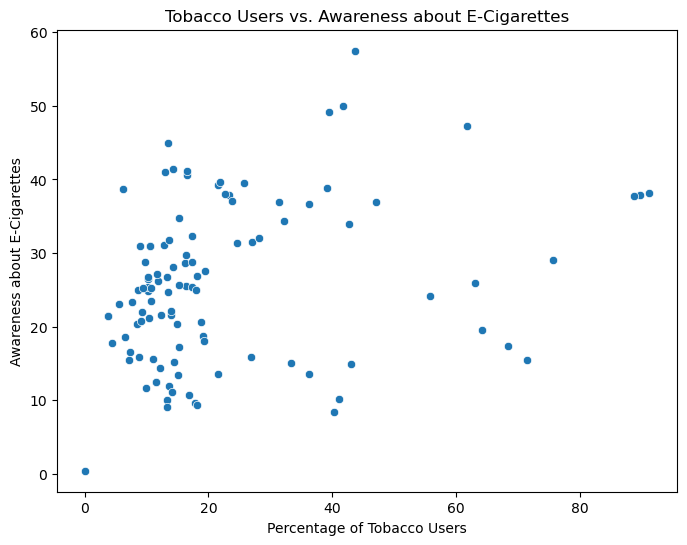

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Ever tobacco users (%)', y='Awareness about e-cigarette (%)')
plt.title('Tobacco Users vs. Awareness about E-Cigarettes')
plt.xlabel('Percentage of Tobacco Users')
plt.ylabel('Awareness about E-Cigarettes')
plt.show()

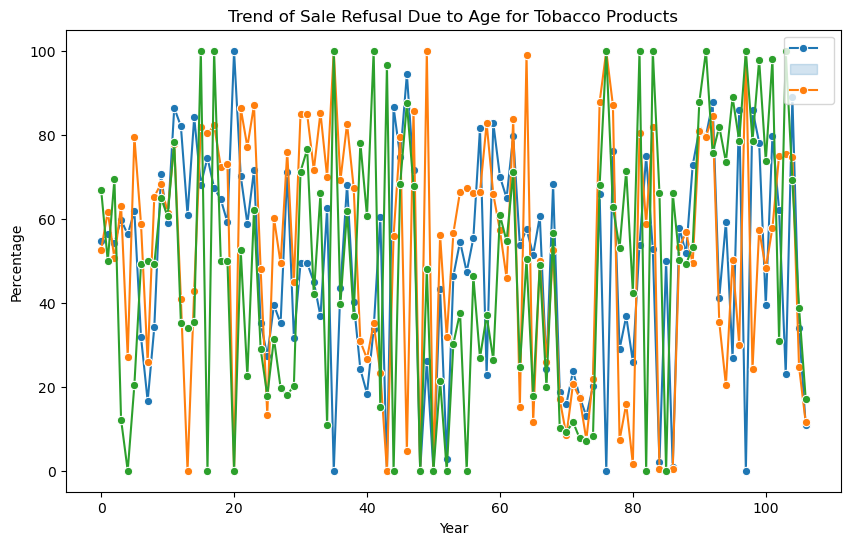

In [14]:
sale_refusal_columns = ['Refused sale of cigarette because of age in past 30 days   (%)',
                        'Refused sale of bidi because of age in past 30 days   (%)',
                        'Refused sale of smokeless tobacco because of age in past 30 days    (%)']
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[sale_refusal_columns], dashes=False, marker='o')
plt.title('Trend of Sale Refusal Due to Age for Tobacco Products')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right', labels=[col.split(' ')[-2] for col in sale_refusal_columns])
plt.show()

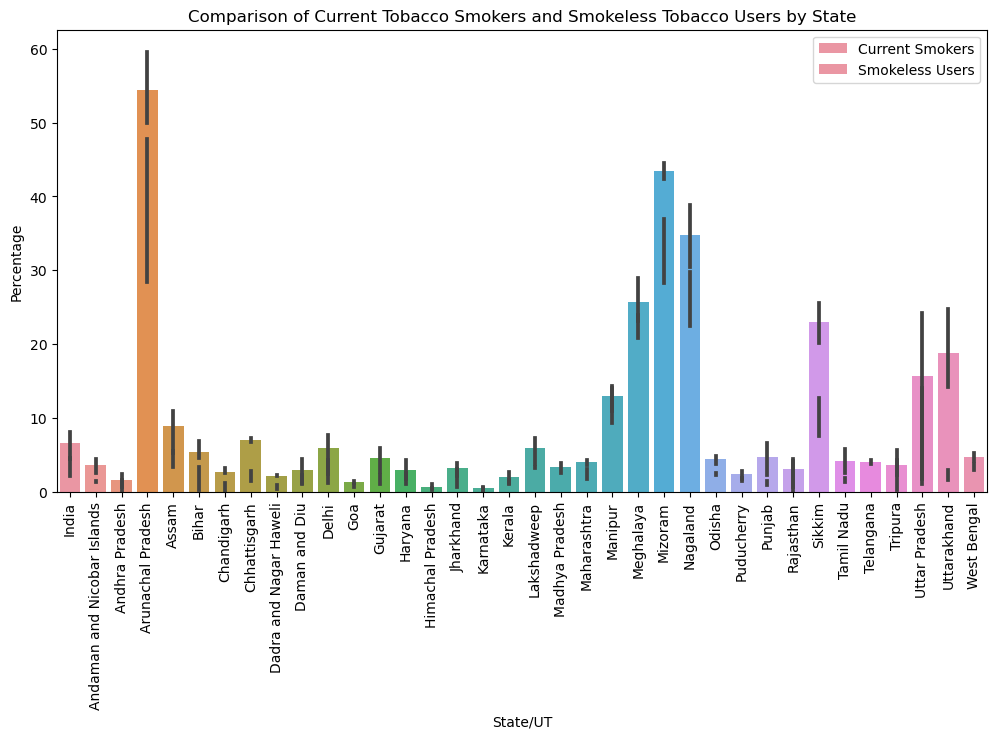

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='State/UT', y='Current tobacco smokers (%)', label='Current Smokers')
sns.barplot(data=data, x='State/UT', y='Current smokeless tobacco users (%)', label='Smokeless Users')
plt.title('Comparison of Current Tobacco Smokers and Smokeless Tobacco Users by State')
plt.xlabel('State/UT')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

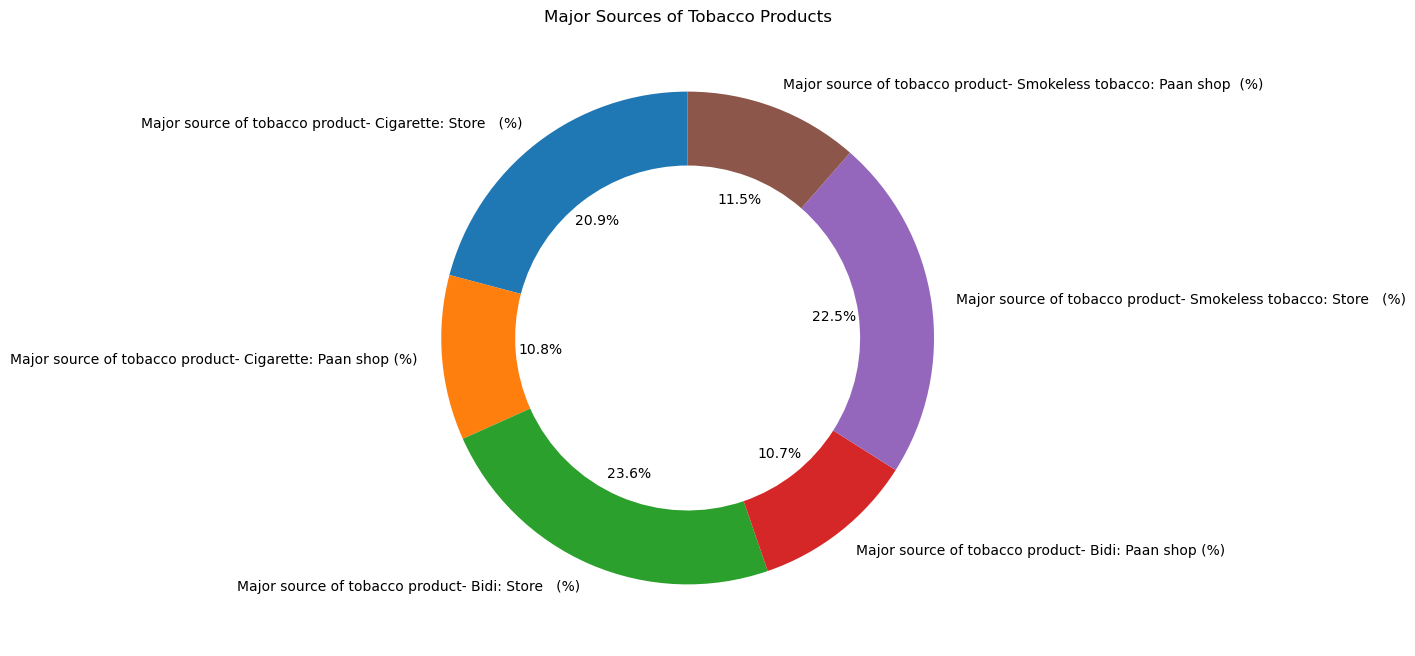

In [16]:
source_columns = ['Major source of tobacco product- Cigarette: Store   (%)',
                  'Major source of tobacco product- Cigarette: Paan shop (%)',
                  'Major source of tobacco product- Bidi: Store   (%)',
                  'Major source of tobacco product- Bidi: Paan shop (%)',
                  'Major source of tobacco product- Smokeless tobacco: Store   (%)',
                  'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)']
source_data = data[source_columns].mean()

plt.figure(figsize=(8, 8))
plt.pie(source_data, labels=source_data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Major Sources of Tobacco Products')
plt.show()

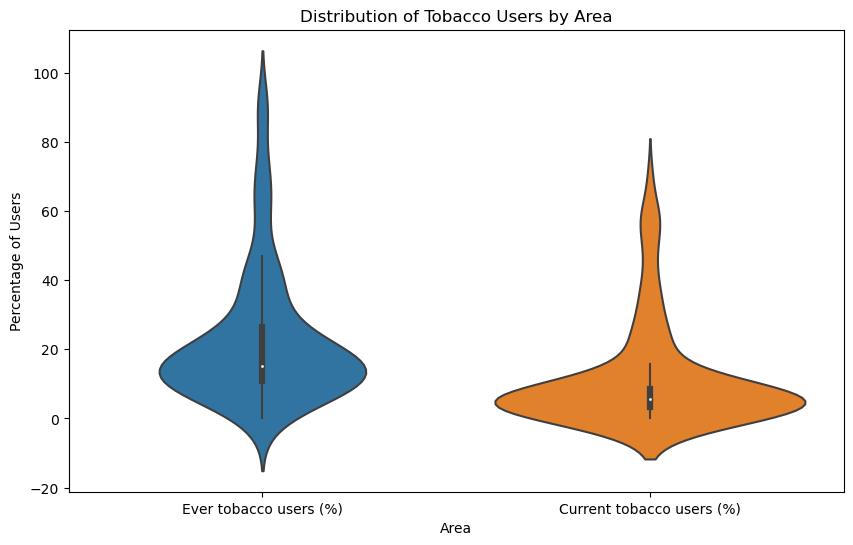

In [17]:
area_columns = ['Ever tobacco users (%)', 'Current tobacco users (%)']
area_data = data[area_columns]

plt.figure(figsize=(10, 6))
sns.violinplot(data=area_data)
plt.title('Distribution of Tobacco Users by Area')
plt.xlabel('Area')
plt.ylabel('Percentage of Users')
plt.show()

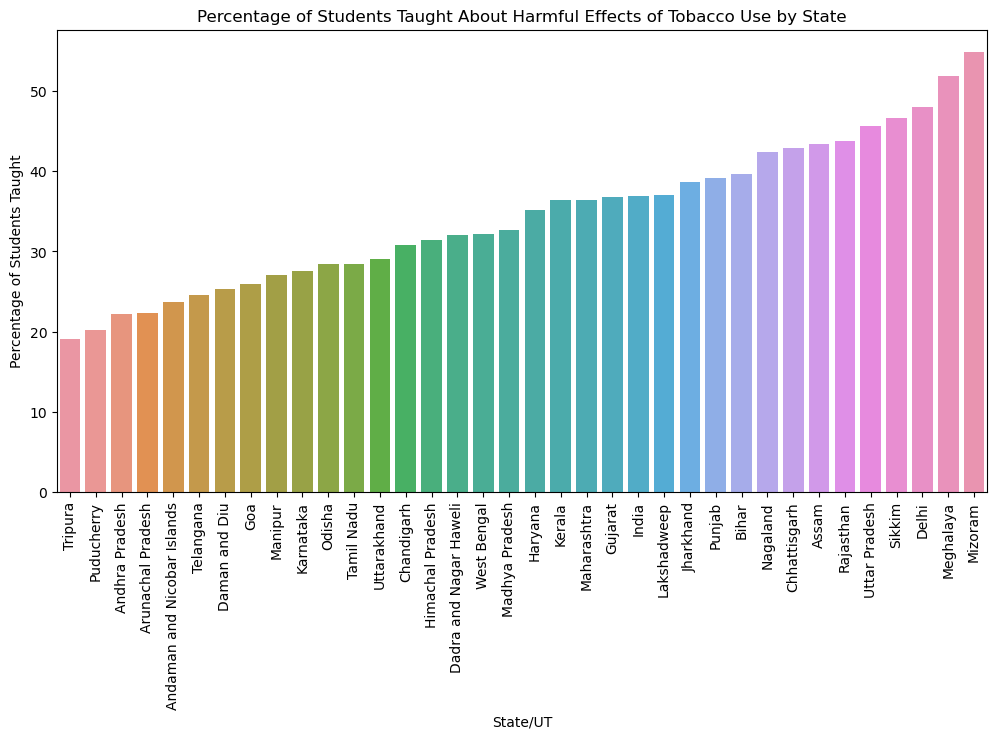

In [18]:
teaching_column = 'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'
teaching_data = data.groupby('State/UT')[teaching_column].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=teaching_data.index, y=teaching_data.values)
plt.title('Percentage of Students Taught About Harmful Effects of Tobacco Use by State')
plt.xlabel('State/UT')
plt.ylabel('Percentage of Students Taught')
plt.xticks(rotation=90)
plt.show()

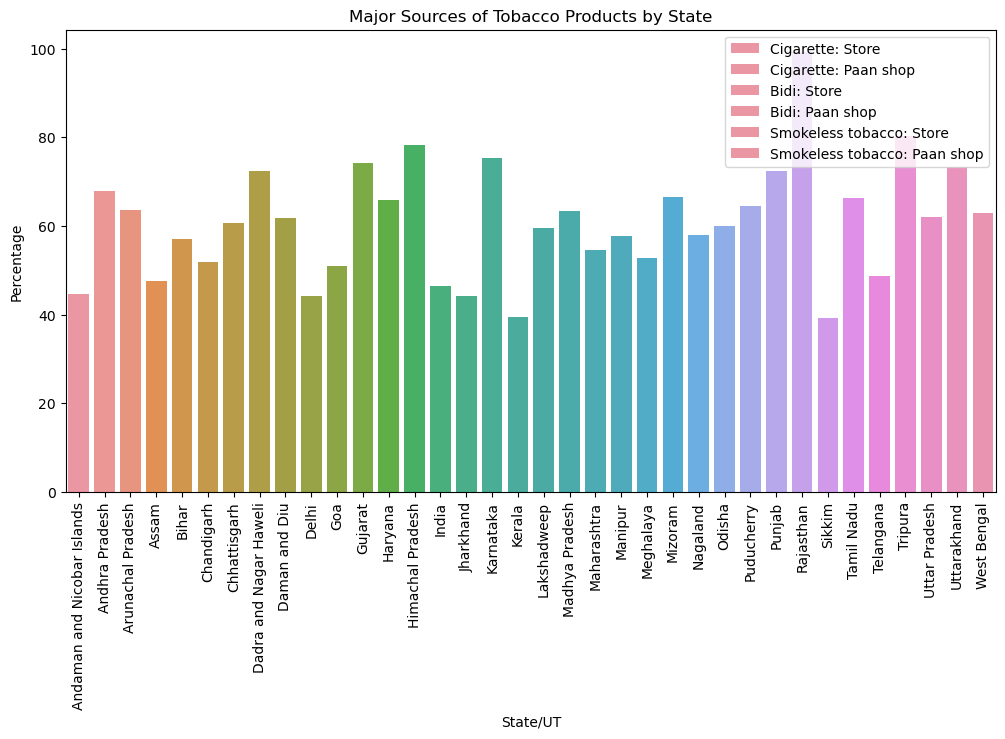

In [19]:
source_columns = ['Major source of tobacco product- Cigarette: Store   (%)',
                  'Major source of tobacco product- Cigarette: Paan shop (%)',
                  'Major source of tobacco product- Bidi: Store   (%)',
                  'Major source of tobacco product- Bidi: Paan shop (%)',
                  'Major source of tobacco product- Smokeless tobacco: Store   (%)',
                  'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)']
state_data = data.groupby('State/UT')[source_columns].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_data, x='State/UT', y=source_columns[0], label='Cigarette: Store')
sns.barplot(data=state_data, x='State/UT', y=source_columns[1], label='Cigarette: Paan shop')
sns.barplot(data=state_data, x='State/UT', y=source_columns[2], label='Bidi: Store')
sns.barplot(data=state_data, x='State/UT', y=source_columns[3], label='Bidi: Paan shop')
sns.barplot(data=state_data, x='State/UT', y=source_columns[4], label='Smokeless tobacco: Store')
sns.barplot(data=state_data, x='State/UT', y=source_columns[5], label='Smokeless tobacco: Paan shop')
plt.title('Major Sources of Tobacco Products by State')
plt.xlabel('State/UT')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

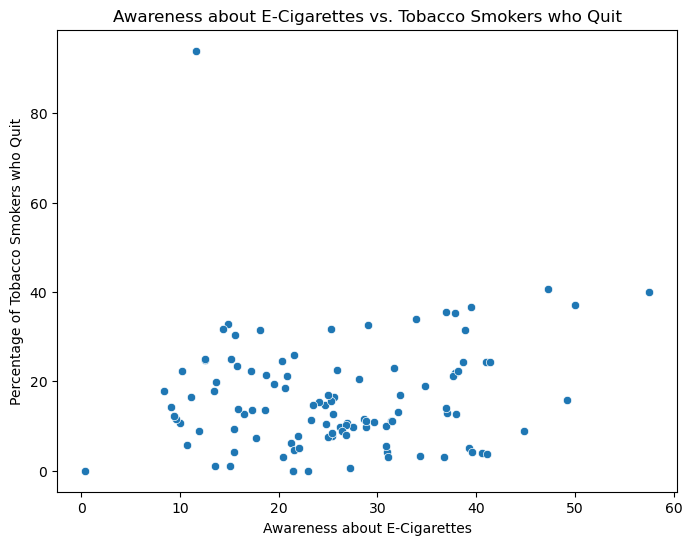

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Awareness about e-cigarette (%)', y='Ever tobacco smokers who quit in last 12 months (%)')
plt.title('Awareness about E-Cigarettes vs. Tobacco Smokers who Quit')
plt.xlabel('Awareness about E-Cigarettes')
plt.ylabel('Percentage of Tobacco Smokers who Quit')
plt.show()

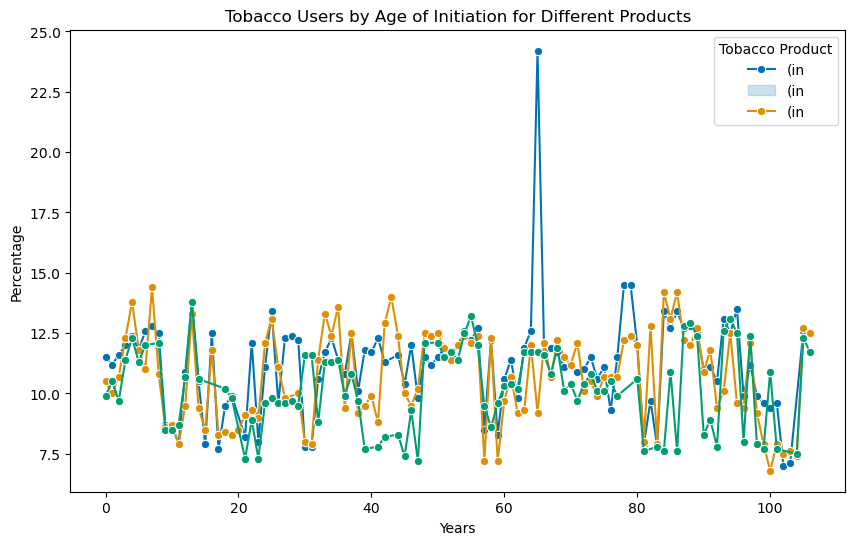

In [21]:
age_columns = ['Median age of initiation of Cigarette (in years)', 'Median age of initiation of Bidi (in years)',
               'Median age of initiation of smokeless tobacco (in years)']
age_data = data[age_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_data, dashes=False, marker='o', palette='colorblind')
plt.title('Tobacco Users by Age of Initiation for Different Products')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.legend(title='Tobacco Product', labels=[col.split(' ')[-2] for col in age_columns])
plt.show()

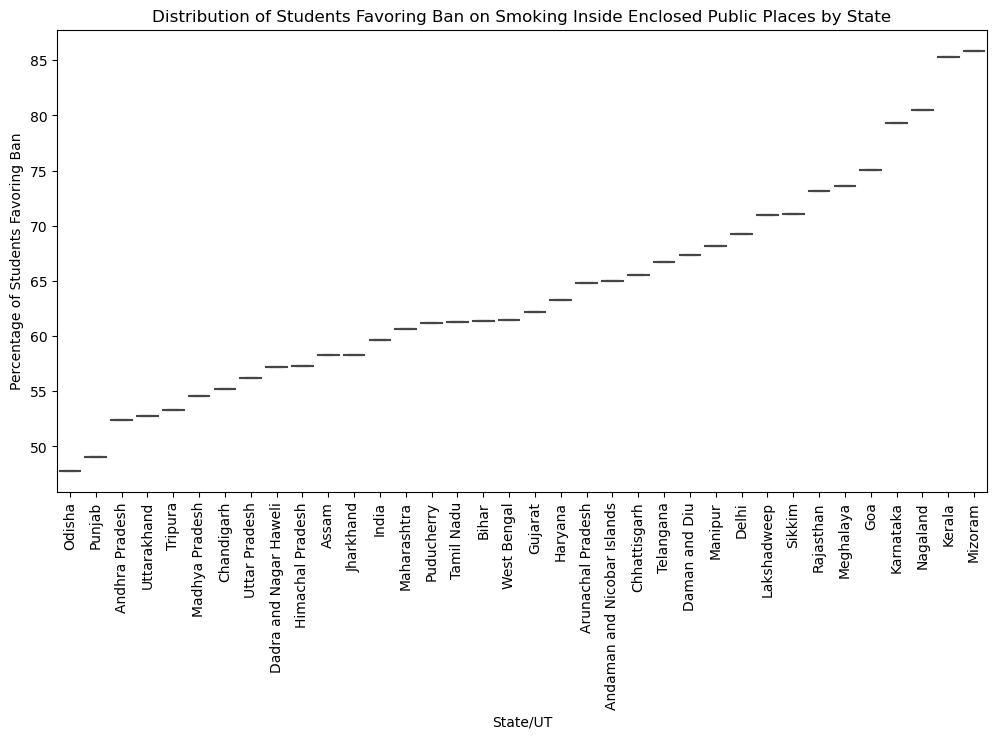

In [22]:
ban_column = 'Students who favoured ban on smoking inside enclosed public places (%)'
ban_data = data.groupby('State/UT')[ban_column].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.boxplot(x=ban_data.index, y=ban_data.values)
plt.title('Distribution of Students Favoring Ban on Smoking Inside Enclosed Public Places by State')
plt.xlabel('State/UT')
plt.ylabel('Percentage of Students Favoring Ban')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

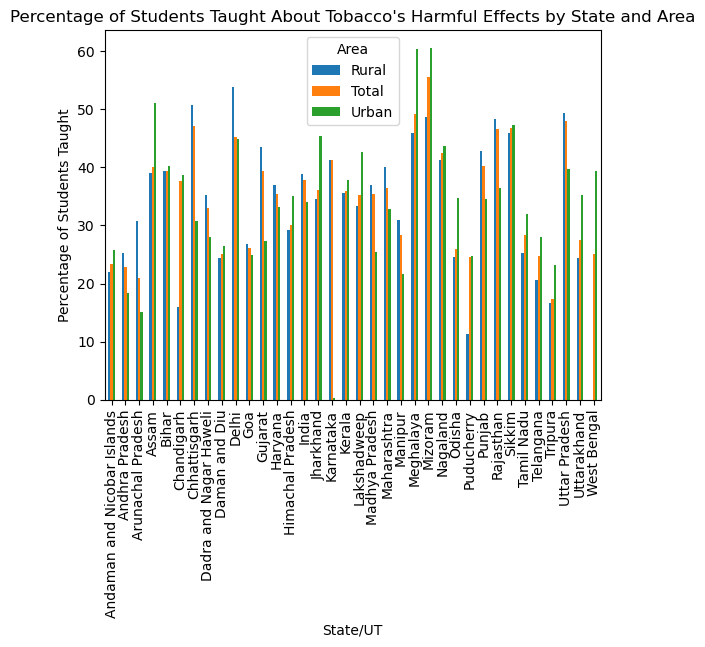

In [23]:
teaching_column = 'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)'
teaching_data = data.pivot_table(index='State/UT', columns='Area', values=teaching_column)

plt.figure(figsize=(12, 6))
teaching_data.plot(kind='bar', rot=90)
plt.title('Percentage of Students Taught About Tobacco\'s Harmful Effects by State and Area')
plt.xlabel('State/UT')
plt.ylabel('Percentage of Students Taught')
plt.legend(title='Area')
plt.show()